Nome: Felipe Faustino Brito

Matrícula: 2021007366

# Correlação e Transformada Discreta de Fourier

In [60]:
from scipy.fft import fft
from numpy import arange, floor, angle, pi
import matplotlib.pyplot as plt

def espectro1D(sinal, fs):
    fsinal = fft( sinal )
    
    N = sinal.size
    df = fs/N
    freq = arange(0,fs,df)
    
    #fig, axs = plt.subplots(2,1)
    # plt.figure(nfig)
    
    ax1 = plt.subplot(2,1,1)
    Ampl = 2*abs( fsinal[0:int(floor(N/2))] )/N
    Ampl[0] = Ampl[0] / 2; # correcao na amplitude da componente DC
    ax1.stem( freq[0:int(floor(N/2))], Ampl )
    ax1.set_ylabel( 'Amplitude' )
    #axs[0].set_xlabel( 'Freq. [Hz]' )
    ax1.axis([0,fs/2,0,1.1*max(Ampl)])
    ax1.grid(True)

    # ax2 = plt.subplot(2,1,2)
    # Fase = (angle( fsinal[0:int(floor(N/2))] ) )*180/pi
    # ax2.stem( freq[0:int(floor(N/2))], Fase )
    # ax2.set_ylabel( 'Fase [graus]' )
    # ax2.set_xlabel( 'Freq. [Hz]' )
    # ax2.axis([0,fs/2,1.1*min(Fase),1.1*max(Fase)])
    # ax2.grid(True)

    plt.show()

1) Um sinal anexo a este documento possui 3 componentes estacionárias (30Hz, 300Hz e
520Hz) com diferentes amplitudes e algum ruído. Ele foi contaminado com um sinal de curta
duração (componentes 6kHz e 7kHz) cujo instante de ocorrência é desconhecido. Utilizando
a Correlação Cruzada, encontre o instante em que este sinal contaminante aparece no sinal
principal e estime sua duração.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

In [61]:

with open('signals/sinalContaminado.npy', 'rb') as f:
    Ts2 = np.load(f)
    signal = np.load(f)

print(Ts2)
print(signal)

5e-05
[116.4892289  127.54269323 120.80016379 ... 129.4360814  132.36778074
 129.58412616]


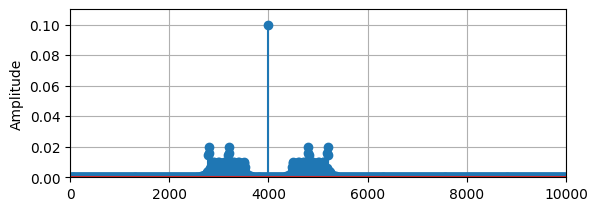

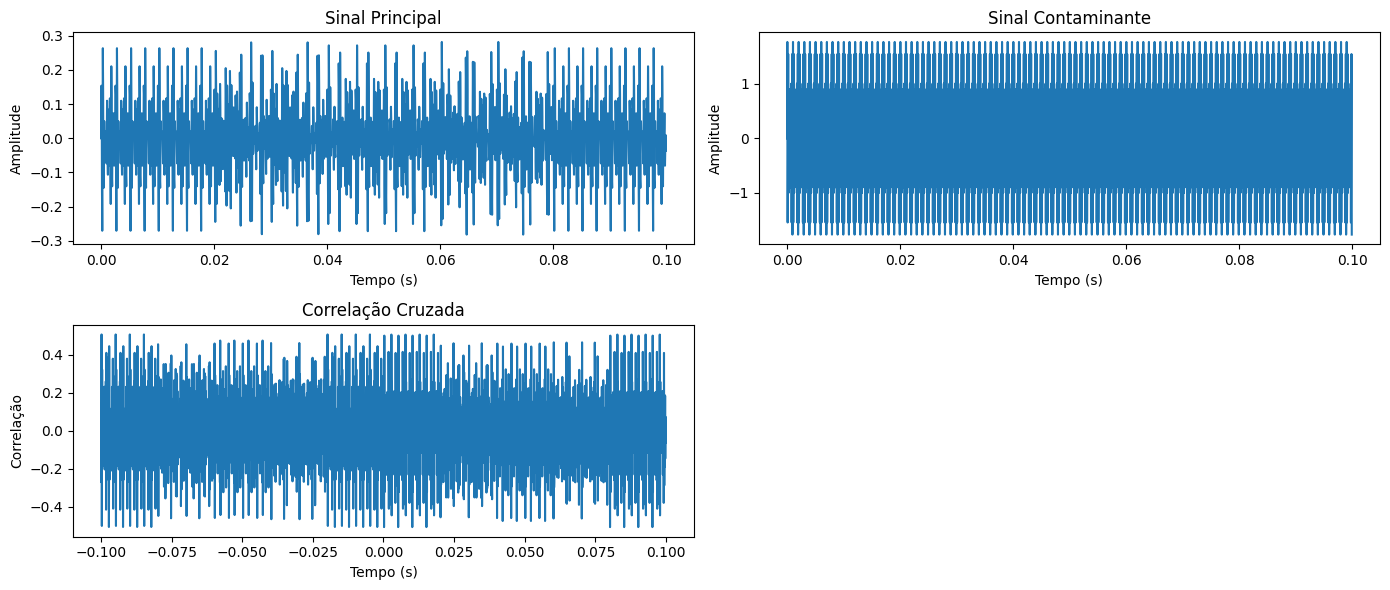

Instante de ocorrência: 0.0102 segundos
Duração estimada do sinal contaminante: 0.0264 segundos


In [67]:
# Taxa de amostragem (assumida, deve ser conhecida ou especificada)
fs = 20000  # Exemplo de taxa de amostragem em Hz

# Espectro do sinal principal contaminado
espectro1D(signal, fs)

# Gerando um sinal de referência para a correlação cruzada
# Combinação das frequências contaminantes 6kHz e 7kHz
t = np.arange(len(signal)) / fs
contaminant = np.sin(2 * np.pi * 6000 * t) + np.sin(2 * np.pi * 7000 * t)

correlation = correlate(signal, contaminant, mode='full')
lags = np.arange(-len(contaminant) + 1, len(signal))

# Encontrar o índice de máxima correlação
max_corr_index = np.argmax(np.abs(correlation))
time_of_occurrence = lags[max_corr_index] / fs

# Estimativa da duração do sinal contaminante
threshold = 0.5 * np.max(correlation)
significant_lags = np.abs(correlation) > threshold
duration = np.sum(significant_lags) / fs


plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Sinal Principal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

# Plotar o sinal contaminante
plt.subplot(2, 2, 2)
plt.plot(t[:len(contaminant)], contaminant)
plt.title('Sinal Contaminante')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

# Plotar a correlação cruzada
plt.subplot(2, 2, 3)
plt.plot(lags / fs, correlation)
plt.title('Correlação Cruzada')
plt.xlabel('Tempo (s)')
plt.ylabel('Correlação')

plt.tight_layout()
plt.show()

print(f'Instante de ocorrência: {time_of_occurrence:.4f} segundos')
print(f'Duração estimada do sinal contaminante: {duration:.4f} segundos')

2)  Identificar dígitos codificados em sinais DTMF.

In [64]:

with open('signals/DTMF-s6.npy', 'rb') as f:
    Ts2 = np.load(f)
    signal = np.load(f)

print(Ts2)
print(signal)

5e-05
[ 0.          0.15376819  0.12733197 ... -0.03464254  0.00977491
 -0.03644311]


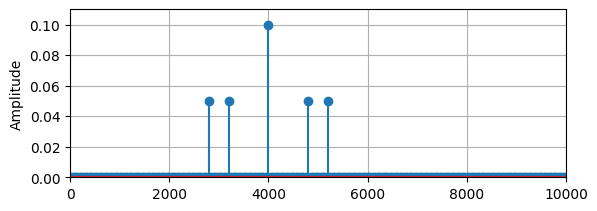

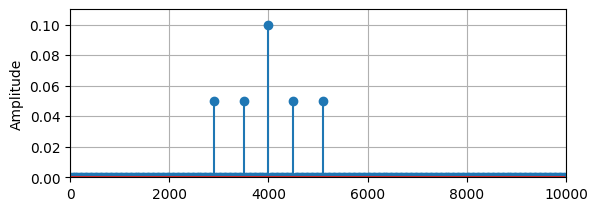

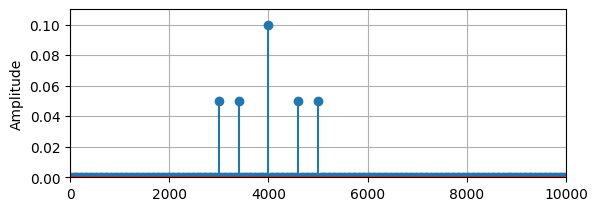

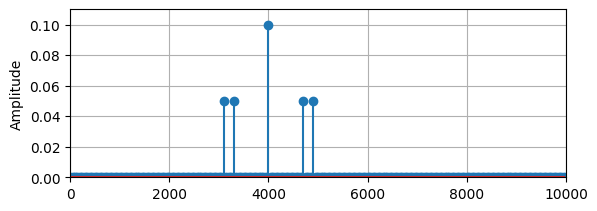

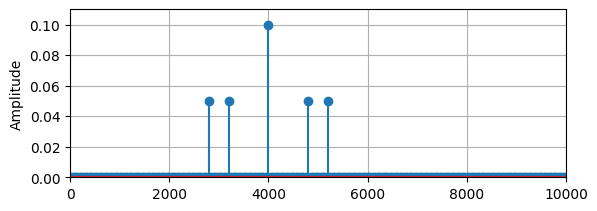

Segmento 1:
  Frequência da Portadora: 4000.0 Hz
  Frequência da Componente: 4800.0 Hz, Amplitude: 9.99999999999999
  Frequência da Componente: 5200.0 Hz, Amplitude: 9.999999999999982
(800.0, 1200.0)
Segmento 2:
  Frequência da Portadora: 4000.0 Hz
  Frequência da Componente: 4500.0 Hz, Amplitude: 9.999999999999982
  Frequência da Componente: 5100.0 Hz, Amplitude: 9.999999999999996
(500.0, 1100.0)
Segmento 3:
  Frequência da Portadora: 4000.0 Hz
  Frequência da Componente: 4600.0 Hz, Amplitude: 9.999999999999963
  Frequência da Componente: 5000.0 Hz, Amplitude: 9.999999999999986
(600.0, 1000.0)
Segmento 4:
  Frequência da Portadora: 4000.0 Hz
  Frequência da Componente: 4700.0 Hz, Amplitude: 9.999999999999972
  Frequência da Componente: 4900.0 Hz, Amplitude: 10.00000000000002
(700.0, 900.0)
Segmento 5:
  Frequência da Portadora: 4000.0 Hz
  Frequência da Componente: 4800.0 Hz, Amplitude: 9.99999999999999
  Frequência da Componente: 5200.0 Hz, Amplitude: 9.999999999999982
(800.0, 1200.0

In [88]:
# Parâmetros
fs = 20000  # Frequência de amostragem em Hz
t_total = 0.1  # Duração total do sinal em segundos
n_total = int(t_total * fs)  # Número total de amostras
n_segment = int(0.02 * fs)  # Número de amostras por segmento

segments = [signal[i:i+n_segment] for i in range(0, n_total, n_segment)]

for i, segment in enumerate(segments):
    espectro1D(segment, fs)

dtmf_freqs = {
    '1': (800, 1200),
    '2': (700, 1200),
    '3': (600, 1200),
    'A': (500, 1200),
    '4': (800, 1100),
    '5': (700, 1100),
    '6': (600, 1100),
    'B': (500, 1100),
    '7': (800, 1000),
    '8': (700, 1000),
    '9': (600, 1000),
    'C': (500, 1000),
    '*': (800, 900),
    '0': (700, 900),
    '#': (600, 900),
    'D': (500, 900),
}

# Função para calcular a FFT e identificar frequências
def identificar_componentes(segment, fs):
    """
    Função para identificar as componentes de frequência presentes em um segmento de sinal.
    A partir da análise da FFT, a função identifica a frequência da portadora a partir da maior amplitude.
    Em seguida, identifica as frequências das componentes ao redor da portadora.
    Por fim retorna a frequência da portadora, as frequências das componentes e suas amplitudes.
    """
    N = len(segment)
    fft_values = np.fft.fft(segment)
    fft_freq = np.fft.fftfreq(N, 1/fs)
    magnitude = np.abs(fft_values)
    
    # Identificar a frequência da portadora
    idx_max = np.argmax(magnitude)
    freq_portadora = fft_freq[idx_max]
    amp_portadora = magnitude[idx_max]
    
    # Encontrar componentes ao redor da portadora
    tolerancia_min = (amp_portadora / 2) * 0.95
    tolerancia_max = (amp_portadora / 2) * 1.05
    idxs_componentes = np.where((magnitude >= tolerancia_min) & (magnitude <= tolerancia_max) & (fft_freq > freq_portadora))[0]
    
    frequencias_componentes = fft_freq[idxs_componentes]
    amplitudes_componentes = magnitude[idxs_componentes]
    
    return freq_portadora, frequencias_componentes, amplitudes_componentes


digitos = []
# Identificar e exibir componentes para cada segmento
for i, segment in enumerate(segments):
    freq_portadora, frequencias_componentes, amplitudes_componentes = identificar_componentes(segment, fs)
    print(f'Segmento {i+1}:')
    print(f'  Frequência da Portadora: {freq_portadora} Hz')
    for freq, amp in zip(frequencias_componentes, amplitudes_componentes):
        print(f'  Frequência da Componente: {freq} Hz, Amplitude: {amp}')

    frequencias = tuple(float(frq) - float(freq_portadora) for frq in frequencias_componentes)
    print(frequencias)
    digitos.append([key for key, value in dtmf_freqs.items() if value == frequencias])


print("Nome do arquivo do sinal utilizado: DTMF-s6.npy")
print("Dígitos codificados no sinal: ", digitos)
